In [93]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [94]:
cols = ['protein_seq','type']
df = pd.read_csv('../data/sequences_training.txt')
df.columns = cols

In [95]:
df.describe()

,protein_seq,type
count,8794,8794
unique,8794,4
top,MAAAKAEMQLMSPLQISDPFGSFPHSPTMDNYPKLEEMMLLSNGAP...,nonDRNA
freq,1,7859


In [96]:
amino_acids_groups = {
                        'nonpolar': ['G','A','V','L','I','P','F','M','W'],
                        'polar'   : ['S','C','T','N','Q'],
                        'acidic'  : ['D','E'],
                        'basic'   : ['R','H','K']                    
                     }
#check if one group is higher in proportion for certain interactions with certain groups than others

In [97]:
dna = df.loc[df['type'] == 'DNA']
dna.drop(['type'],axis=1,inplace=True)
nondrna = df.loc[df['type'] == 'nonDRNA']
nondrna.drop(['type'],axis=1,inplace=True)
rna = df.loc[df['type'] == 'RNA']
rna.drop(['type'],axis=1,inplace=True)
drna = df.loc[df['type'] == 'DRNA']
drna.drop(['type'],axis=1,inplace=True)

C:\Users\15715\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [98]:
from collections import Counter
def group_aa_types(df,aa_groups):
    collection = df['protein_seq'].apply(Counter)
    t = {'non_polar':0, 'polar':0,'acidic':0,'basic':0}
    #this code sucks
    l = 0
    for idx,val in collection.iteritems(): 
        l += len(val)
        temp = val['G'] + val['A'] + val['V'] + val['L'] + val['I'] + val['P'] + val['F'] + val['M'] + val['W']
        t['non_polar'] += (temp)
        temp = val['S'] + val['C'] + val['T'] + val['N'] + val['Q']
        t['polar'] += (temp)
        temp = val['D'] + val['E']
        t['acidic'] += (temp)
        temp += val['R'] + val['H'] +val['K']
        t['basic'] += (temp)
    
    t['non_polar'] = t['non_polar']/l 
    t['polar'] = t['polar']/l
    t['acidic'] = t['acidic']/l
    t['basic'] = t['basic']/l
    return t


In [99]:
physio_dna = group_aa_types(dna,amino_acids_groups)
physio_nondrna = group_aa_types(nondrna,amino_acids_groups)
physio_rna = group_aa_types(rna,amino_acids_groups)
physio_drna = group_aa_types(drna,amino_acids_groups)


In [100]:
#def normalize(data):


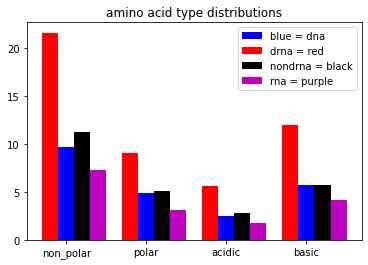

In [102]:
#labels,vals = zip(*physio_dna.items())
#plt.bar(labels,vals,color = 'red')
#l2,v2 = zip(*physio_drna.items())
#plt.bar(l2,v2,color = 'k')
X = np.arange(len(physio_dna))
ax = plt.subplot(111)
ax.bar(X,physio_dna.values(),width = 0.2,color='b',align='center')
ax.bar(X-0.2,physio_drna.values(),width = 0.2,color='r',align='center')
ax.bar(X+0.2,physio_nondrna.values(),width = 0.2,color='k',align='center')
ax.bar(X+0.4,physio_rna.values(),width = 0.2,color = 'm',align='center')
ax.legend(('blue = dna','drna = red','nondrna = black','rna = purple'))
plt.xticks(X,physio_dna.keys())
plt.title('amino acid type distributions')
plt.show()